# ETAPE 1: ANALYSE EXPLORATOIRE DES FICHIERS 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [2]:
sirh = pd.read_csv('extrait_sirh.csv')
sondage = pd.read_csv('extrait_sondage.csv')
eval = pd.read_csv('extrait_eval.csv')

## I- Le fichier Sirh

In [3]:
# Affichage des 5 premières lignes de chaque DataFrame  
print(sirh.shape)
sirh.head()

(1470, 12)


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


In [4]:
sirh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


Chaque type semble correspondre à sa feature

In [5]:
sirh.describe()

,id_employee,age,revenu_mensuel,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000
mean,1024.865306,36.923810,6502.931293,2.693197,80.0,11.279592,7.008163,4.229252
std,602.024335,9.135373,4707.956783,2.498009,0.0,7.780782,6.126525,3.623137
min,1.000000,18.000000,1009.000000,0.000000,80.0,0.000000,0.000000,0.000000
25%,491.250000,30.000000,2911.000000,1.000000,80.0,6.000000,3.000000,2.000000
50%,1020.500000,36.000000,4919.000000,2.000000,80.0,10.000000,5.000000,3.000000
75%,1555.750000,43.000000,8379.000000,4.000000,80.0,15.000000,9.000000,7.000000
max,2068.000000,60.000000,19999.000000,9.000000,80.0,40.000000,40.000000,18.000000


In [6]:
sirh['nombre_heures_travailless'].unique()

array([80])

On a une seule valeur pour toutes les lignes, ce qui est certainement une erreur de saisie ou valeur par défaut, n'ayant pas de possibilité d'avoir les vraies valeurs nous allons devoir supprimer cette colonne car avec une seule valeur sur toutes les lignes elle ne peut nous apporter aucune tendance pour la modélisation 

In [7]:
sirh.drop(columns=['nombre_heures_travailless'], inplace=True)

## II- Le fichier sondage

In [8]:
print(sondage.shape)
sondage.head()

(1470, 12)


,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [9]:
sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

Chaque type semble correspondre à sa feature

In [10]:
sondage.describe()

,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.793878,2.799320,1.0,1024.865306,9.192517,2.912925,2.187755,4.123129
std,0.852077,1.289271,0.0,602.024335,8.106864,1.024165,3.222430,3.568136
min,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.0,491.250000,2.000000,2.000000,0.000000,2.000000
50%,1.000000,3.000000,1.0,1020.500000,7.000000,3.000000,1.000000,3.000000
75%,1.000000,3.000000,1.0,1555.750000,14.000000,4.000000,3.000000,7.000000
max,3.000000,6.000000,1.0,2068.000000,29.000000,5.000000,15.000000,17.000000


In [11]:
sondage['nombre_employee_sous_responsabilite'].unique()

array([1])

In [12]:
sondage['ayant_enfants'].unique()

array(['Y'], dtype=object)

>On a juste une valeur renseignée certainement une erreur de saisie, nous n'avons pas de moyen de vérifier la véracité des informations de ces deux colonnes, de plus ayant une seule information qui se répète sur toutes les lignes de la colonne, elle ne va pas nous apporter grand choses pour la modélisation, donc on va supprimer

In [13]:
sondage.drop(columns=['ayant_enfants','nombre_employee_sous_responsabilite'], inplace=True)

## III- Le fichier eval

In [14]:
print(eval.shape)
eval.head()

(1470, 10)


,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


In [15]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

In [16]:
eval.describe()

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,note_evaluation_actuelle
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.721769,2.729932,2.063946,2.728571,2.712245,2.761224,3.153741
std,1.093082,0.711561,1.106940,1.102846,1.081209,0.706476,0.360824
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000
max,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000


## IV- Regroupement des fichiers 

Etant donnée qu'il n'y a pas d'identifiant unique qui se répète sur tous les fichiers, et que le nombre de ligne est exactement les mêmes pour les 3 fichiers, nous pouvons donc estimer qu'ils sont alignés, et nous n'avons autres choix que de faire une concaténation sur l'axe 1

### 1- Création du fichier central 

In [17]:
data = pd.concat([sirh, sondage, eval], axis=1)

In [18]:
data.head()

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,...,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,8,6,...,2,3,2,4,1,1,E_1,3,Oui,11 %
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,10,10,...,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,7,0,...,4,2,1,3,2,3,E_4,3,Oui,15 %
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,8,8,...,4,3,1,3,3,3,E_5,3,Oui,11 %
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,6,2,...,1,3,1,2,4,3,E_7,3,Non,12 %


In [19]:
data.shape

(1470, 31)

### 2- Type de features et description

In [20]:
quant_features = data.select_dtypes(include=[np.number]).columns.tolist()
qual_features = data.select_dtypes(exclude=[np.number]).columns.tolist()

| Feature                                     | Description                                                                        | Type         |
| ------------------------------------------- | ---------------------------------------------------------------------------------- | ------------ |
| `id_employee`                               | Identifiant unique de l'employé                                                    | Quantitative |
| `age`                                       | Âge de l'employé                                                                   | Quantitative |
| `revenu_mensuel`                            | Salaire mensuel de l'employé                                                       | Quantitative |
| `nombre_experiences_precedentes`            | Nombre d’emplois précédents                                                        | Quantitative |
| `nombre_heures_travailless` (**Supprimée**)  | Nombre d’heures travaillées par semaine                                            | Quantitative |
| `annee_experience_totale`                   | Nombre total d’années d’expérience professionnelle                                 | Quantitative |
| `annees_dans_l_entreprise`                  | Nombre d’années passées dans l’entreprise actuelle                                 | Quantitative |
| `annees_dans_le_poste_actuel`               | Nombre d’années passées dans le poste actuel                                       | Quantitative |
| `nombre_participation_pee`                  | Nombre de participations au Plan d’Épargne Entreprise                              | Quantitative |
| `nb_formations_suivies`                     | Nombre de formations suivies par l’employé                                         | Quantitative |
| `nombre_employee_sous_responsabilite` (**Supprimée**) | Nombre d’employés sous sa responsabilité                                           | Quantitative |
| `code_sondage`                              | Code de participation à un sondage interne                                         | Qualitative  |
| `distance_domicile_travail`                 | Distance entre le domicile et le lieu de travail (en km)                           | Quantitative |
| `niveau_education`                          | Niveau d’éducation atteint (1, 2, 3...)                                            | Ordinal      |
| `annees_depuis_la_derniere_promotion`       | Nombre d’années depuis la dernière promotion                                       | Quantitative |
| `annes_sous_responsable_actuel`             | Nombre d’années sous le même responsable actuel                                    | Quantitative |
| `satisfaction_employee_environnement`       | Satisfaction vis-à-vis de l’environnement de travail                               | Ordinal      |
| `note_evaluation_precedente`                | Note de performance lors de l’évaluation précédente                                | Quantitative |
| `niveau_hierarchique_poste`                 | Niveau hiérarchique du poste                                                       | Ordinal      |
| `satisfaction_employee_nature_travail`      | Satisfaction vis-à-vis de la nature du travail                                     | Ordinal      |
| `satisfaction_employee_equipe`              | Satisfaction avec l’équipe                                                         | Ordinal      |
| `satisfaction_employee_equilibre_pro_perso` | Satisfaction sur l’équilibre vie pro / perso                                       | Ordinal      |
| `note_evaluation_actuelle`                  | Note de performance lors de l’évaluation actuelle                                  | Quantitative |
| `genre`                                     | Genre de l’employé (Homme, Femme)                                                  | Binaire      |
| `statut_marital`                            | Statut marital (Célibataire, Marié, Divorcé...)                                    | Qualitative  |
| `departement`                               | Département d’affectation dans l’entreprise                                        | Qualitative  |
| `poste`                                     | Intitulé du poste                                                                  | Qualitative  |
| `a_quitte_l_entreprise`                     | Si l’employé a quitté l’entreprise (oui, non)                                      | Binaire      |
| `domaine_etude`                             | Domaine d’études de l’employé (ex. informatique, RH, etc.)                         | Qualitative  |
| `ayant_enfants` (**Supprimée**)             | Indique si l’employé a des enfants (Y = oui, N = non)                              | Binaire      |
| `frequence_deplacement`                     | Fréquence des déplacements professionnels ('Occasionnel', 'Frequent', 'Aucun')     | Ordinal      |
| `eval_number`                               | Numéro de l’évaluation ou cycle d’évaluation                                       | Quantitative |
| `heure_supplementaires`                     | L’employé fait-il des heures supplémentaires ? (oui, non)                          | Binaire      |
| `augementation_salaire_precedente`          | Pourçantage d'augmentation de salaire précédent                                    | Quantitative |


### 3- Sélection de la cible

Au vu de notre objectif qui est de prédire la démission future des employés, notre cible est donc "a_quitte_l_entreprise"

## V- Traitement des valeurs abérrantes 

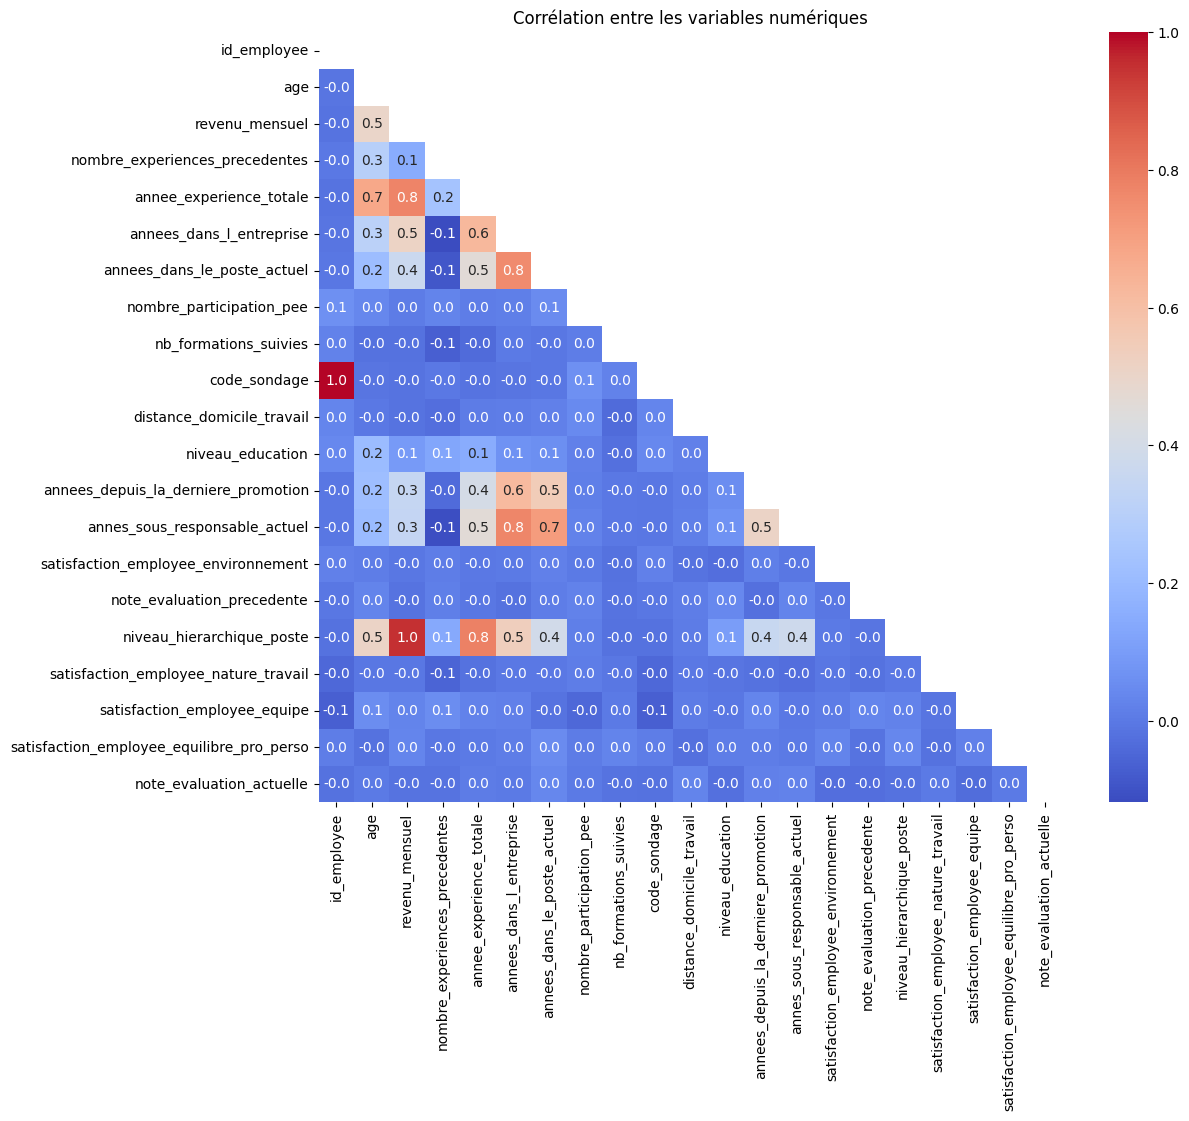

In [21]:
from scipy.stats import f_oneway
# === Corrélation entre variables numériques ===
corr_matrix = data[quant_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", mask=np.triu(corr_matrix))
plt.title("Corrélation entre les variables numériques")
plt.show()

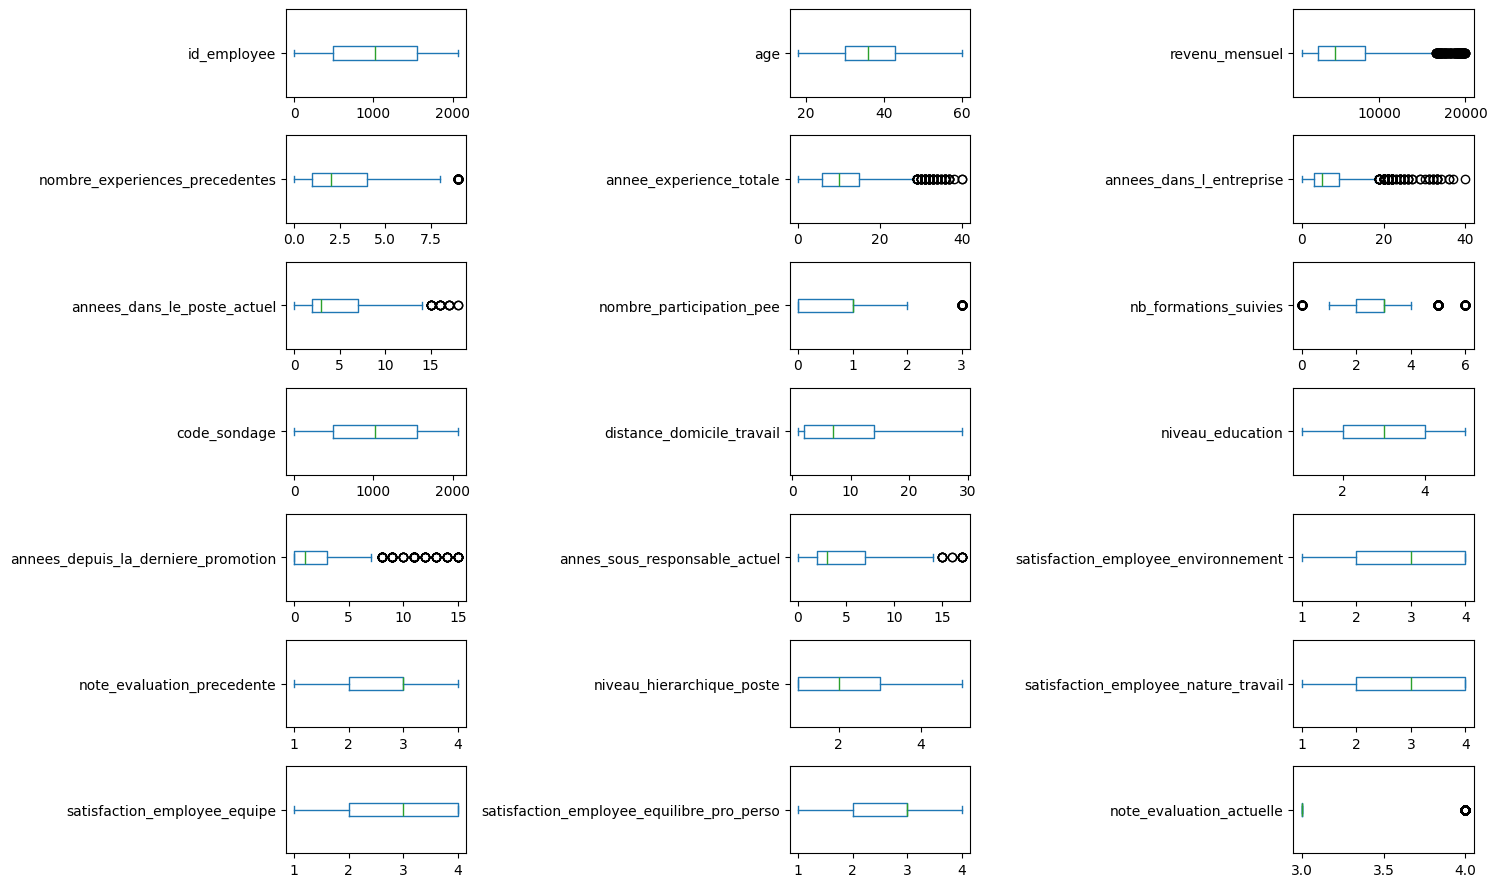

In [22]:
data[quant_features].plot(kind='box', subplots=True, layout=(8, 3), figsize=(15, 10), sharex=False, sharey=False, vert=False)
plt.tight_layout()
plt.show()

### 1- Niveau de revenu

In [23]:
def display_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

In [24]:
display_outliers(data, 'revenu_mensuel')[['id_employee', 'revenu_mensuel']]

,id_employee,revenu_mensuel
25,32,19094
29,38,18947
45,58,19545
62,80,18740
105,140,18844
...,...,...
1374,1938,17875
1377,1941,19161
1401,1973,19636
1437,2022,19431


In [25]:
len (display_outliers(data, 'revenu_mensuel')) / len(data) * 100

7.755102040816326

Nous avons donc 8% d'outliers, ceux ci représentes les 8% de revenue les plus importants de nos données, avant de traiter ces outliers, nous allons créer une colonne de classification des niveau de revenu

📊 Classification des niveaux de revenu mensuel net en France (2025)

| Revenu Mensuel (€)        | Catégorie socio-économique      | Description courante                     |
| ------------------------- | ------------------------------- | ---------------------------------------- |
| **< 1 200 €**             | Très faible revenu              | Sous le seuil de pauvreté (env. 1 200 €) |
| **1 200 € – 1 500 €**     | Faible revenu                   | Revenu modeste, aides sociales possibles |
| **1 500 € – 2 000 €**     | Bas revenu moyen                | Employé à temps plein, souvent précaire  |
| **2 000 € – 2 500 €**     | Revenu moyen                    | Revenu médian en France ≈ 2 300 € net    |
| **2 500 € – 3 500 €**     | Bon revenu moyen                | Supérieur à la médiane                   |
| **3 500 € – 5 000 €**     | Haut revenu                     | Environ top 10%                          |
| **5 000 € – 8 000 €**     | Très haut revenu                | Environ top 5%                           |
| **8 000 € – 12 000 €**    | Ultra haut revenu               | Top 1 %                                  |
| **> 12 000 € – 20 000 €** | Exceptionnel (élite financière) | Top 0,1 % voire top 0,01 %               |


In [26]:
def classifier_revenu(revenu):
    if revenu < 1200:
        return "Très faible revenu"
    elif revenu < 1500:
        return "Faible revenu"
    elif revenu < 2000:
        return "Bas revenu moyen"
    elif revenu < 2500:
        return "Revenu moyen"
    elif revenu < 3500:
        return "Bon revenu moyen"
    elif revenu < 5000:
        return "Haut revenu"
    elif revenu < 8000:
        return "Très haut revenu"
    elif revenu < 12000:
        return "Ultra haut revenu"
    else:
        return "Revenu exceptionnel"
data['classification_revenu'] = data['revenu_mensuel'].apply(classifier_revenu)

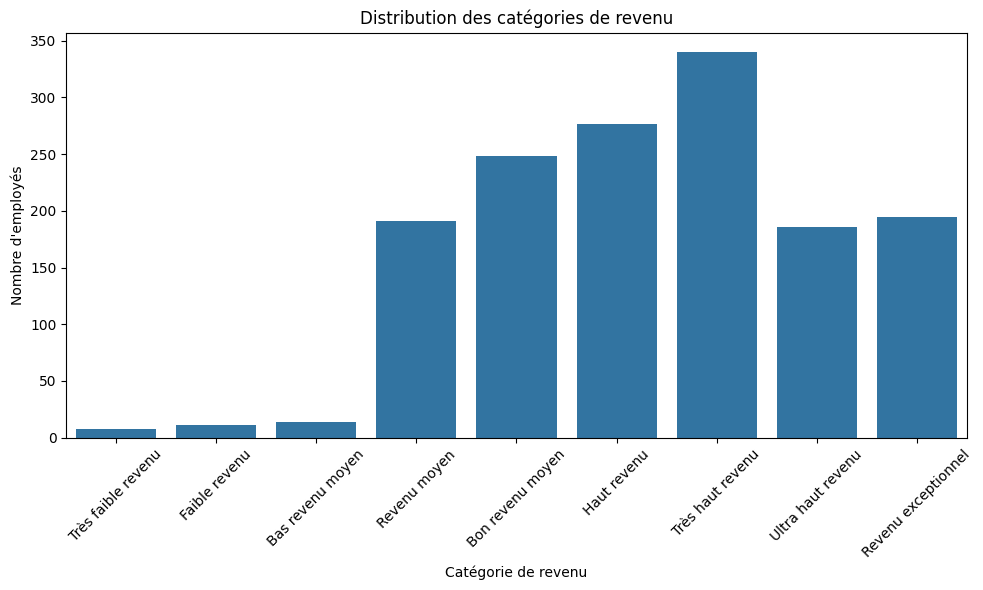

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='classification_revenu', order=[
    "Très faible revenu", "Faible revenu", "Bas revenu moyen", "Revenu moyen", "Bon revenu moyen",
    "Haut revenu", "Très haut revenu", "Ultra haut revenu", "Revenu exceptionnel"
])
plt.title("Distribution des catégories de revenu")
plt.xlabel("Catégorie de revenu")
plt.ylabel("Nombre d'employés")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La répartition étant faite, nous allons procéder au traitement des outliers, vérifions la distribution sur l'histogramme

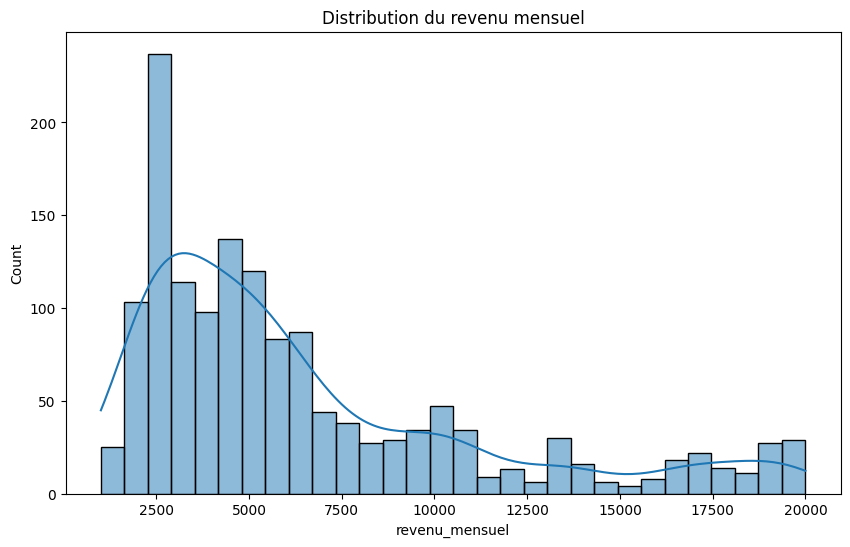

Le skewness du revenu mensuel est de 1.37 et la kurtosis est de 1.01


In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data['revenu_mensuel'], bins=30, kde=True)
plt.title("Distribution du revenu mensuel")
plt.show()
print(f"Le skewness du revenu mensuel est de {data['revenu_mensuel'].skew():.2f} et la kurtosis est de {data['revenu_mensuel'].kurtosis():.2f}")

Avec ce skewness supérieur à 0, on peut donc dire qu'il y'a applatissement des donnée sur la droite, et une forte assymétrie, nous allons donc utiliser une tranformation logarithmique pour le traitement des outliers

In [29]:
# Transformation du revenu mensuel pour réduire l'asymétrie
data['revenu_log'] = np.log1p(data['revenu_mensuel'])

<Axes: xlabel='revenu_log', ylabel='Count'>

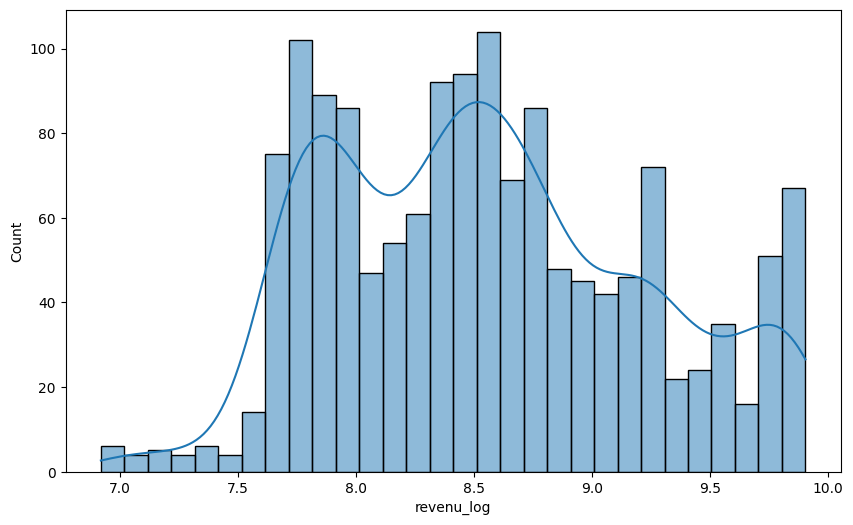

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(data['revenu_log'], bins=30, kde=True)

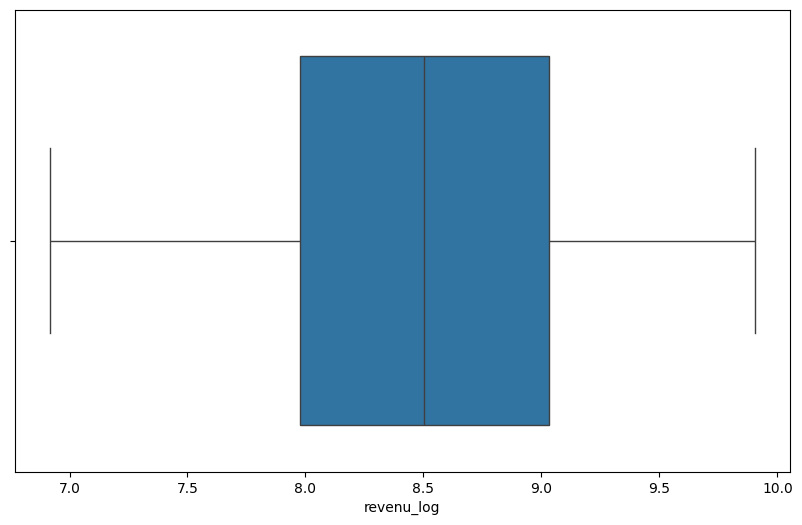

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['revenu_log'])
plt.show()

Nous n'avons plus d'outliers après transformation logarithmique, cette colonne sera donc utilisées au besoin lors de la modélisation, mais pour le moment, nous allons quand même conserver la colonne originale pour la création des features lors du feature engineering

### 2- Année dans l'entreprise

De même nous allons classifier cette feature

| Tranche d'ancienneté (en années) | Catégorie                  |
| -------------------------------- | -------------------------- |
| 0 à 1                            | Nouvel employé             |
| 2 à 3                            | Employé junior             |
| 4 à 6                            | Employé intermédiaire      |
| 7 à 10                           | Employé expérimenté        |
| 11 à 15                          | Employé très expérimenté   |
| 16 à 25                          | Employé senior             |
| 26 à 40                          | Employé vétéran            |


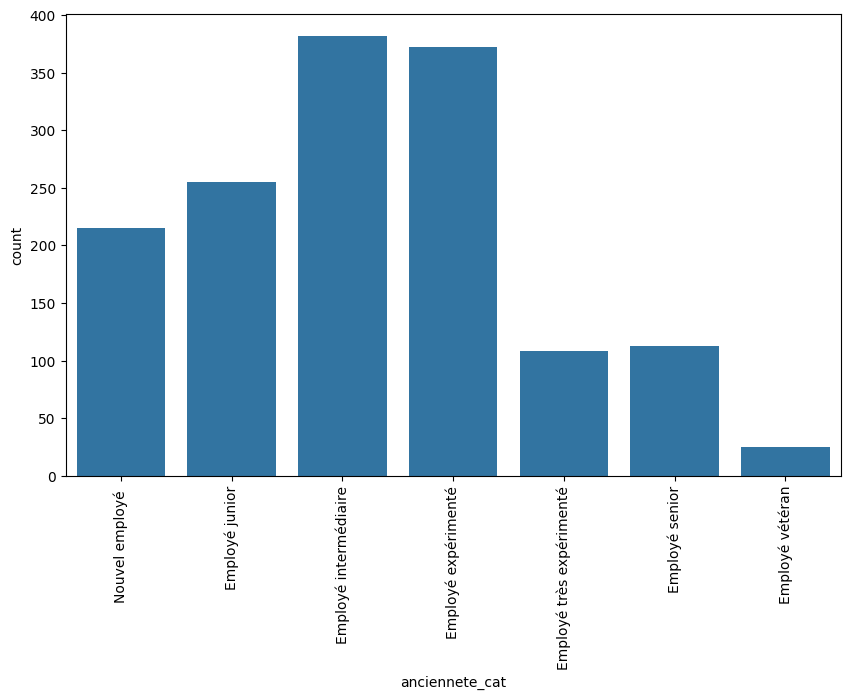

In [32]:
def classifier_anciennete(annees):
    if annees <= 1:
        return "Nouvel employé "
    elif annees <= 3:
        return "Employé junior"
    elif annees <= 6:
        return "Employé intermédiaire"
    elif annees <= 10:
        return "Employé expérimenté"
    elif annees <= 15:
        return "Employé très expérimenté"
    elif annees <= 25:
        return "Employé senior"
    else:
        return "Employé vétéran"

data['anciennete_cat'] = data['annees_dans_l_entreprise'].apply(classifier_anciennete)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='anciennete_cat', order=[
    "Nouvel employé ", "Employé junior", "Employé intermédiaire", "Employé expérimenté",
    "Employé très expérimenté", "Employé senior", "Employé vétéran"
])
plt.xticks(rotation=90)
plt.show()

<Axes: >

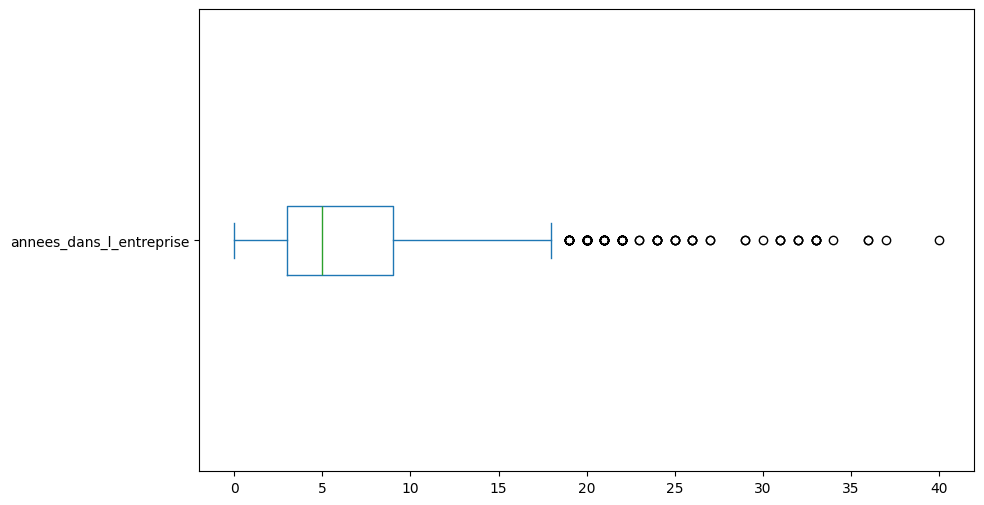

In [33]:
data['annees_dans_l_entreprise'].plot(kind='box', figsize=(10, 6), vert=False)

On observe visuellement qu'il y'a peu d'outliers, on va donc les remplacer par la médiane, avant, nous allons vérifier la distribution

<Axes: ylabel='Frequency'>

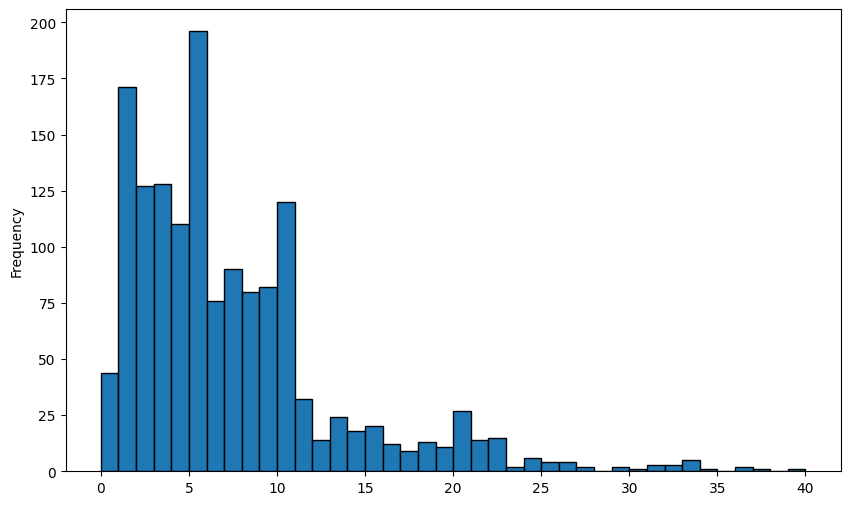

In [34]:
data['annees_dans_l_entreprise'].plot(kind='hist', figsize=(10, 6), bins=40, edgecolor='black')

In [35]:
data['age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [36]:
def remplace_outliers_by_median(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[((df[col] <= lower_bound) | (df[col] >= upper_bound)), col] = df[col].median()
    #return df

In [37]:
remplace_outliers_by_median(data, 'annees_dans_l_entreprise')

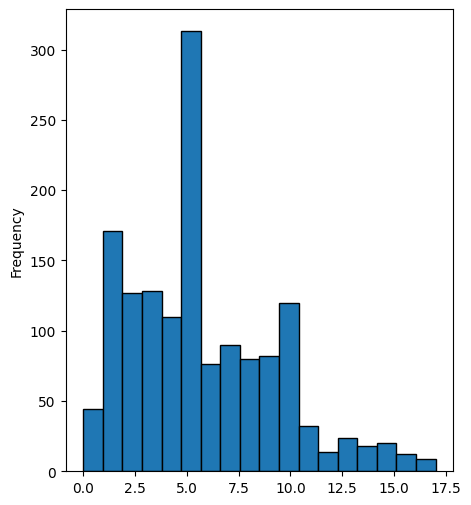

In [38]:
data['annees_dans_l_entreprise'].plot(kind='hist', figsize=(5, 6), bins=18,  edgecolor='black')
plt.show()

On observe que la distribution est restée presque inchangée, on a juste la barre de la médiane qui a augmentée, ce qui est logique 

<Axes: >

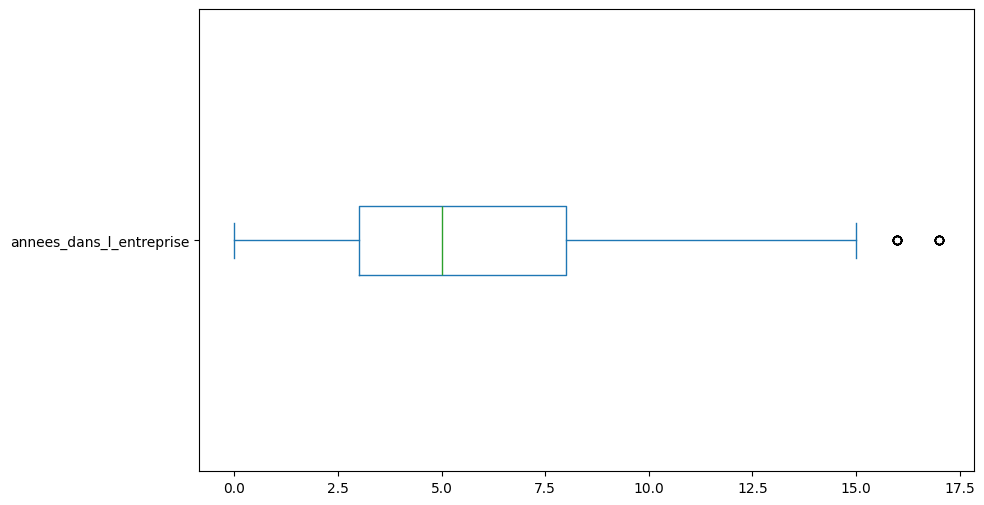

In [39]:
data['annees_dans_l_entreprise'].plot(kind='box', figsize=(10, 6), vert=False)

On peut supprimer les deux derniers outliers 

In [40]:
def del_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [41]:
data = del_outliers(data, 'annees_dans_l_entreprise')

<Axes: >

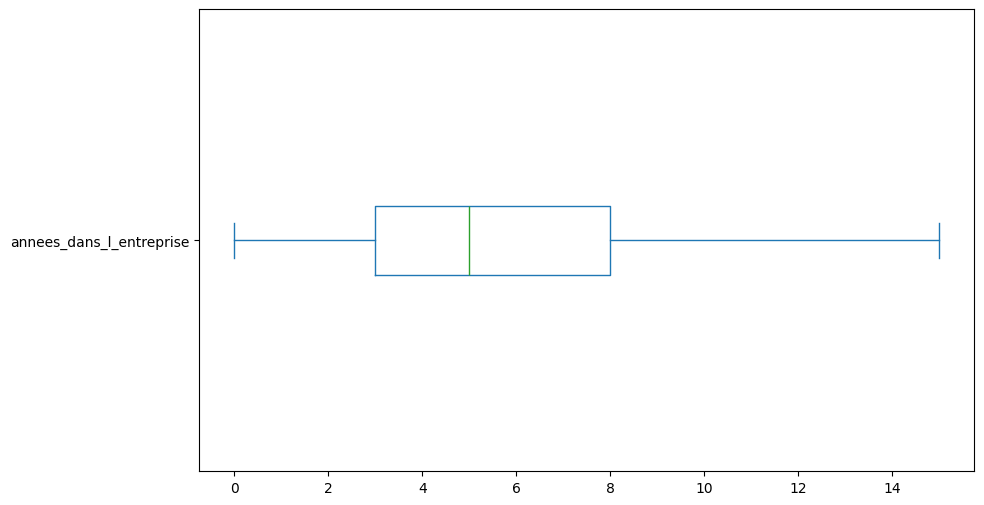

In [42]:
data['annees_dans_l_entreprise'].plot(kind='box', figsize=(10, 6), vert=False)

### 3- Année expérience total

<Axes: ylabel='Frequency'>

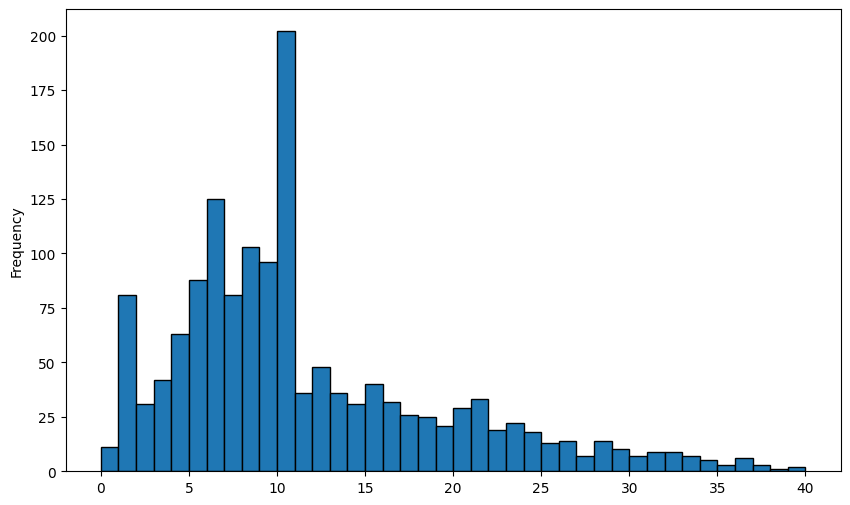

In [43]:
data['annee_experience_totale'].plot(kind='hist', figsize=(10, 6), bins=40, edgecolor='black')

<Axes: >

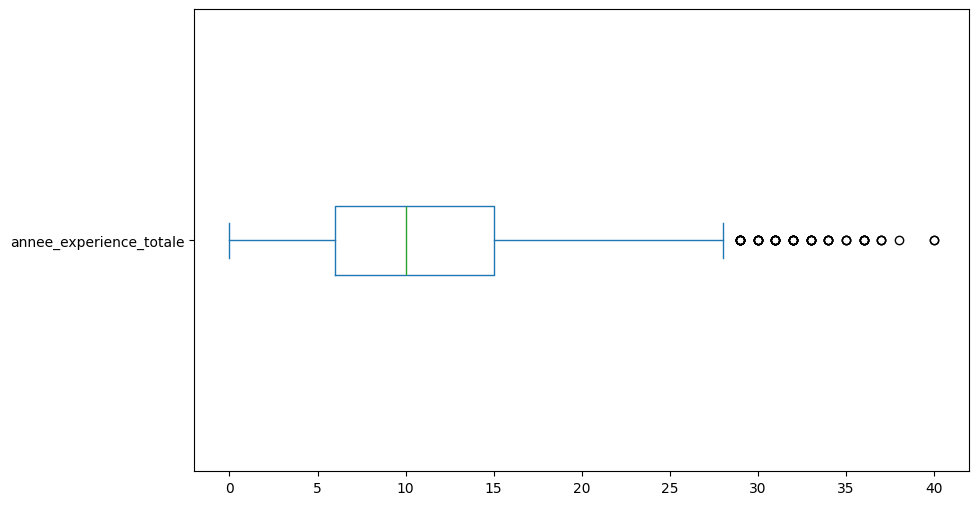

In [44]:
data['annee_experience_totale'].plot(kind='box', figsize=(10, 6), vert=False)

In [45]:
remplace_outliers_by_median(data, 'annee_experience_totale')

In [46]:
data['annee_experience_totale'].median()

np.float64(10.0)

<Axes: ylabel='Frequency'>

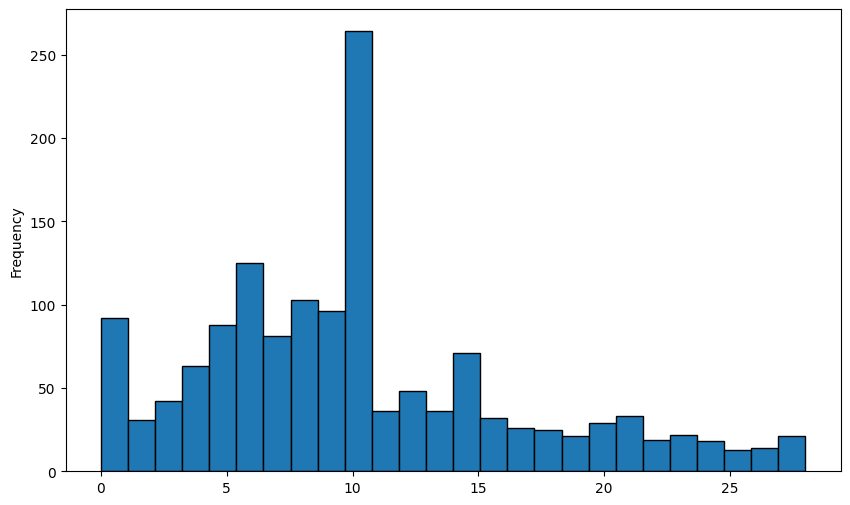

In [47]:
data['annee_experience_totale'].plot(kind='hist', figsize=(10, 6), bins=26,  edgecolor='black')

<Axes: >

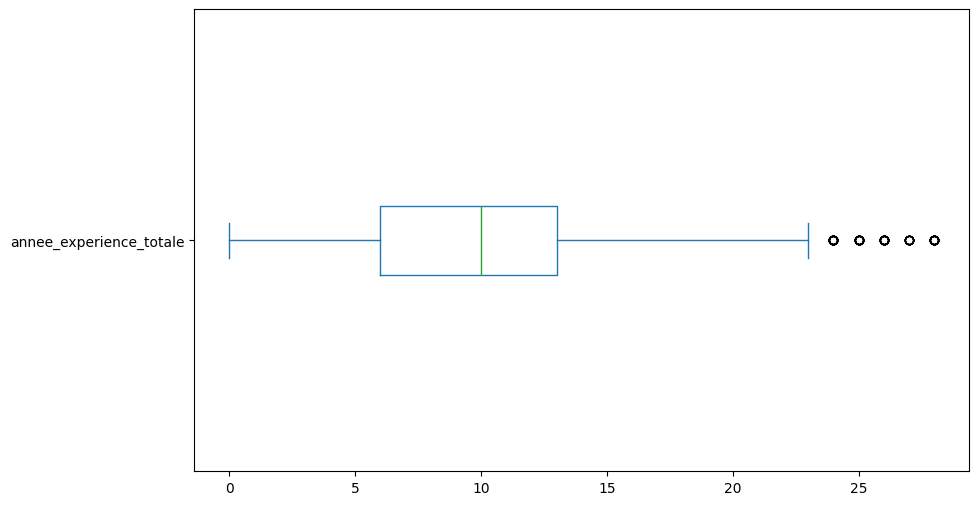

In [48]:
data['annee_experience_totale'].plot(kind='box', figsize=(10, 6), vert=False)

On supprime le reste d'outliers

In [49]:
data = del_outliers(data, 'annee_experience_totale')

<Axes: >

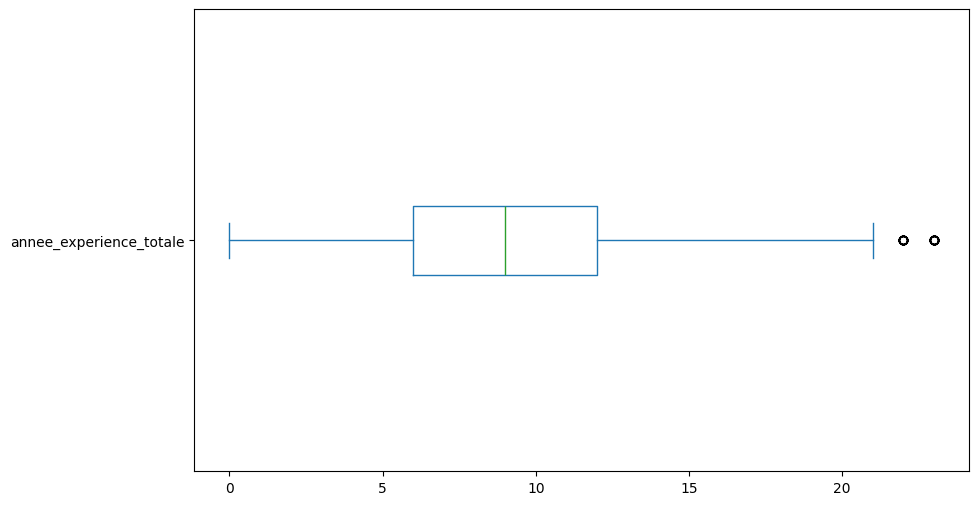

In [50]:
data['annee_experience_totale'].plot(kind='box', figsize=(10, 6), vert=False)

On remplace les outliers restant par les bornes

In [51]:
def remplace_outliers_by_bound(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remplace les valeurs en dehors des bornes par les bornes elles-mêmes
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound
    

In [52]:
remplace_outliers_by_bound(data, 'annee_experience_totale')

<Axes: >

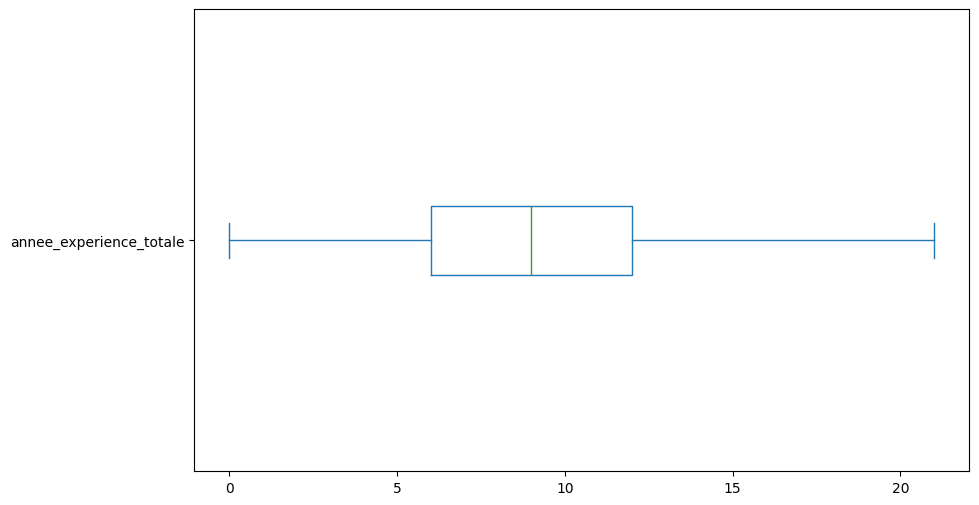

In [53]:
data['annee_experience_totale'].plot(kind='box', figsize=(10, 6), vert=False)

### 4- Nombre d'expérience précédentes

<Axes: >

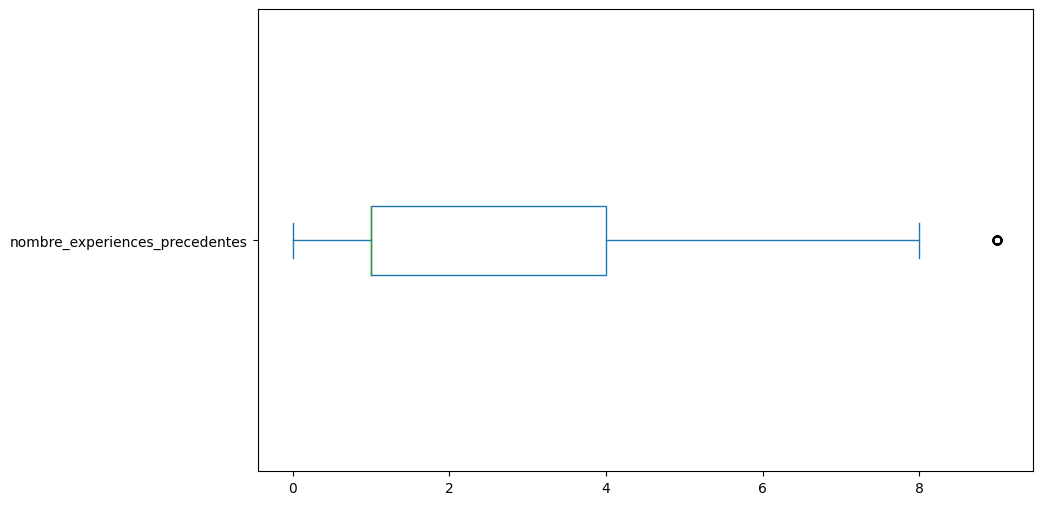

In [54]:
data['nombre_experiences_precedentes'].plot(kind='box', figsize=(10, 6), vert=False)

In [55]:
remplace_outliers_by_median(data, 'nombre_experiences_precedentes')

<Axes: >

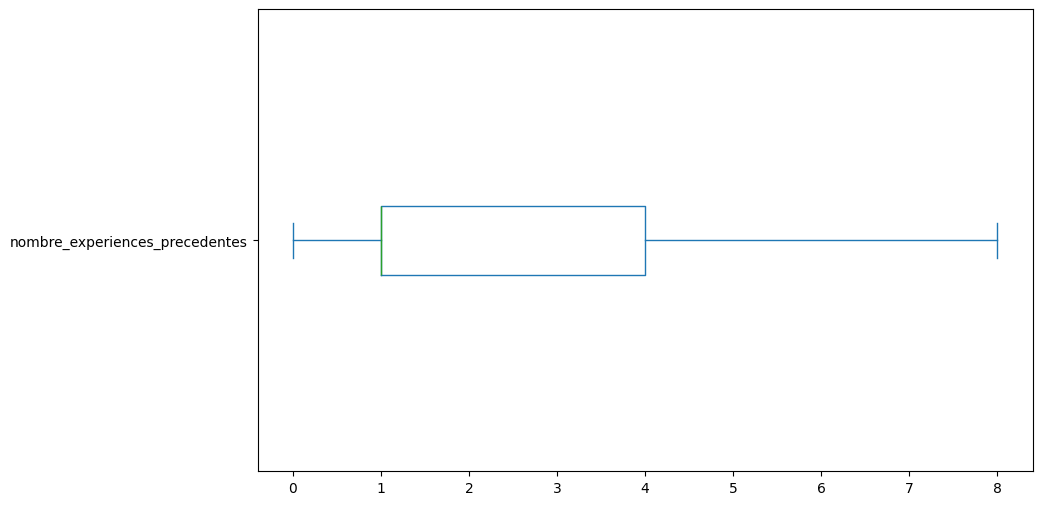

In [56]:
data['nombre_experiences_precedentes'].plot(kind='box', figsize=(10, 6), vert=False)

### 5- Autres features liées aux années

In [57]:
remplace_outliers_by_median(data, 'annees_dans_le_poste_actuel')
remplace_outliers_by_median(data, 'annees_depuis_la_derniere_promotion')
remplace_outliers_by_median(data, 'annes_sous_responsable_actuel')

### 6- Visualisation générale 

In [58]:
quant_features = data.select_dtypes(include=np.number).columns.tolist()

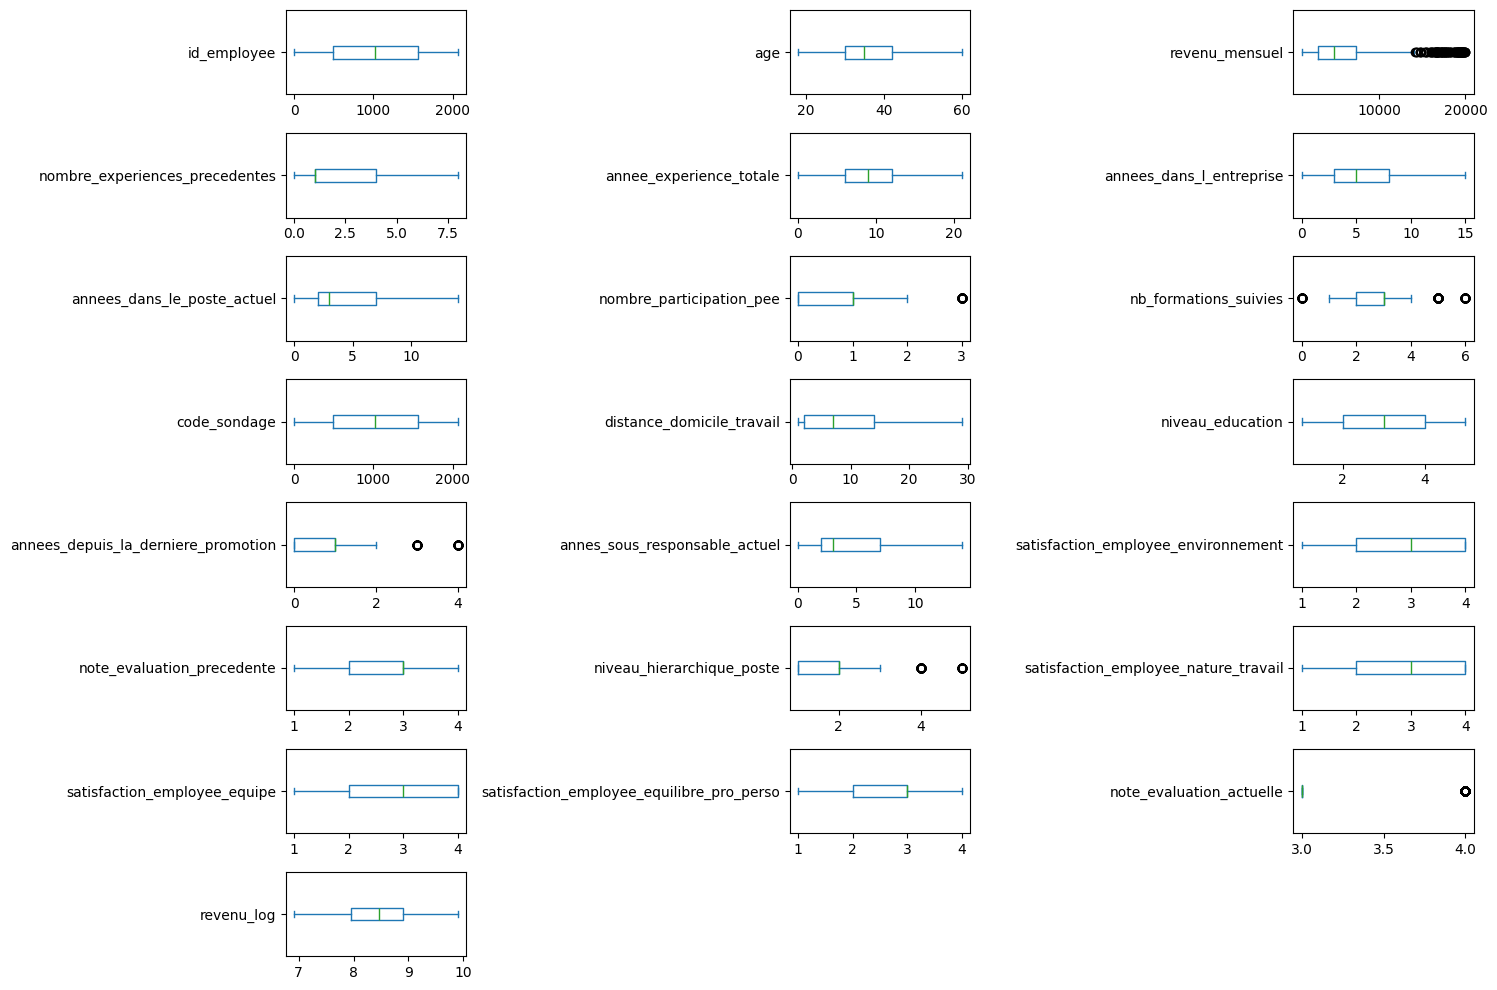

In [59]:
data[quant_features].plot(kind='box', subplots=True, layout=(8, 3), figsize=(15, 10), sharex=False, sharey=False, vert=False)
plt.tight_layout()
plt.show()

Nous avons procédé au nettoyage des outliers sur les colonnes principales afin de garantir la qualité de nos données.
Toutefois, afin d’éviter toute perte d’information, nous avons choisi de conserver les valeurs extrêmes présentes dans les autres variables.
En effet, certaines colonnes comme nombre_participation_pee ne comportent que quelques modalités (0, 1, 2, 3). Bien que la valeur 3 soit détectée comme un outlier selon le boxplot, la supprimer ou la remplacer par la médiane reviendrait à appauvrir significativement la diversité de cette variable.
Dans cette logique, nous avons donc décidé de préserver l’intégralité des données sur les autres features, car leur modification pourrait nuire à la richesse informative nécessaire à un bon apprentissage du modèle.

### 7- Vérification des corrélations

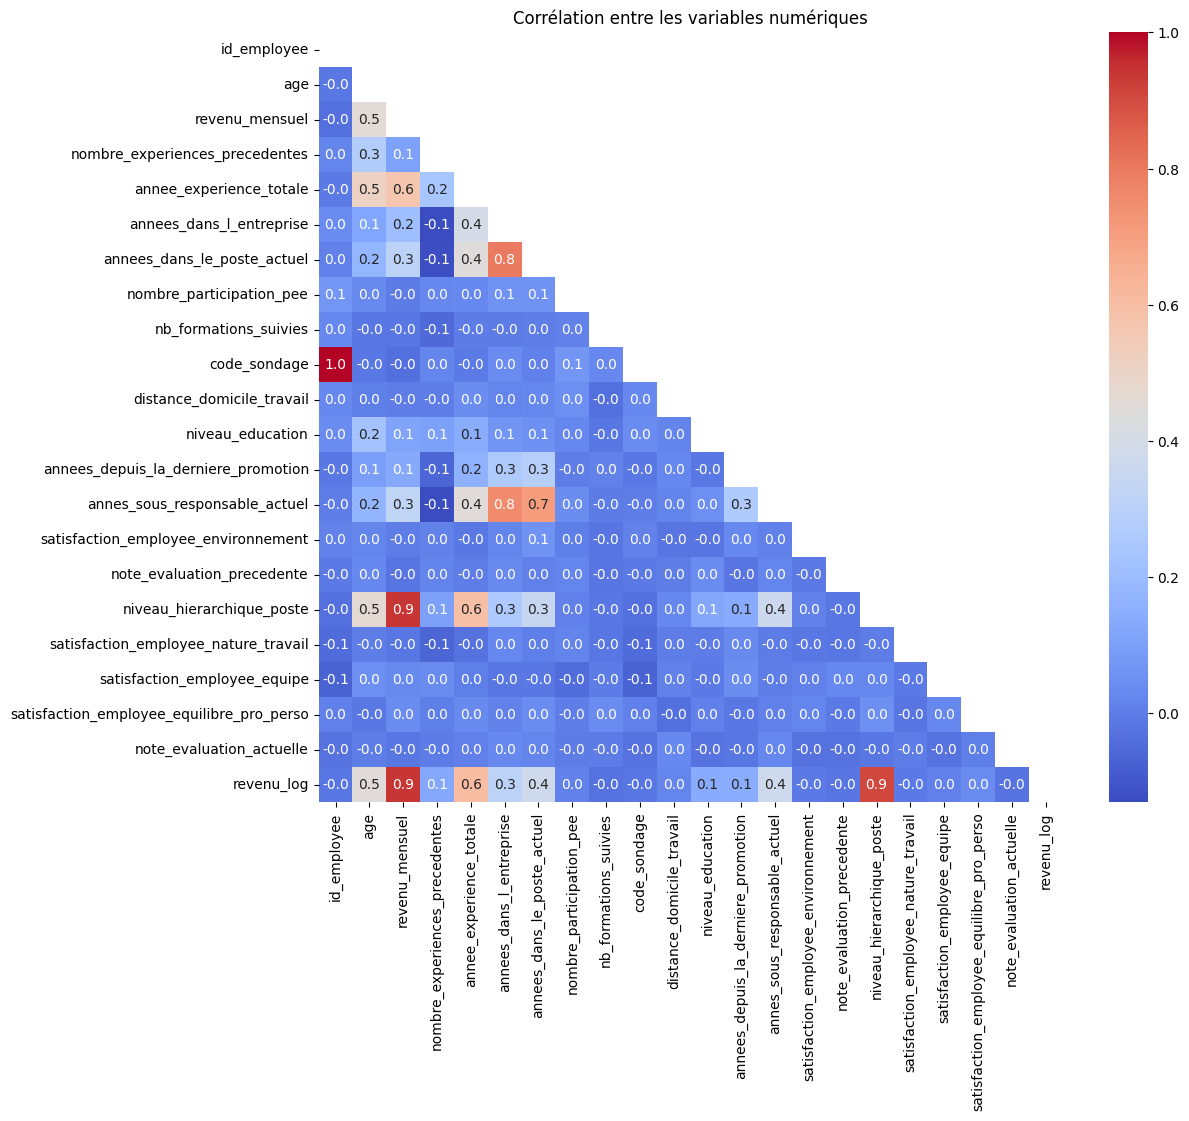

In [60]:
from scipy.stats import f_oneway
# === Corrélation entre variables numériques ===
corr_matrix = data[quant_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", mask=np.triu(corr_matrix))
plt.title("Corrélation entre les variables numériques")
plt.show()

**Interprétations des fortes corrélations**

Il y'a une forte corrélation entre : 

- "code sondage" et "id employé", ces deux colonnes ne seront pas utiles pour la modélisation, nous pouvons donc ne pas les prendre en compte ou tout simplement retirer "code sondage"
- "niveau hierachique" et "revenu mensuel" ceci semble logique dans le sens où le salaire augmente avec le niveau de poste, mais nous n'allons pas retirer ces colonnes qui nous servirons pour le feature engineering.
- "revenu mensuel" et "revenu log" ce qui est logique car "revenu log" est juste la transformation logarithmique de "revenu mensuel" pas nécessaire de retirer car l'une vas nous servir pour le feature engineering et l'autre pour la modélisation

In [61]:
data.drop(columns='code_sondage', inplace=True)

In [62]:
quant_features = data.select_dtypes(include=np.number).columns.tolist()

## VI- Traitement des valeurs manquantes et doublons

### 1- Valeurs manquantes

In [63]:
def number_of_na (df, columns):
    for elt in columns:
        df[elt].isna().sum()
        #print(f"Nombre de valeurs manquantes dans {elt} : {df[elt].isna().sum()}")
        print(f"Pourcentage de valeurs manquantes dans {elt} : {df[elt].isna().sum()/len(df)*100:.2f}%")

In [64]:
number_of_na(data, quant_features)

Pourcentage de valeurs manquantes dans id_employee : 0.00%
Pourcentage de valeurs manquantes dans age : 0.00%
Pourcentage de valeurs manquantes dans revenu_mensuel : 0.00%
Pourcentage de valeurs manquantes dans nombre_experiences_precedentes : 0.00%
Pourcentage de valeurs manquantes dans annee_experience_totale : 0.00%
Pourcentage de valeurs manquantes dans annees_dans_l_entreprise : 0.00%
Pourcentage de valeurs manquantes dans annees_dans_le_poste_actuel : 0.00%
Pourcentage de valeurs manquantes dans nombre_participation_pee : 0.00%
Pourcentage de valeurs manquantes dans nb_formations_suivies : 0.00%
Pourcentage de valeurs manquantes dans distance_domicile_travail : 0.00%
Pourcentage de valeurs manquantes dans niveau_education : 0.00%
Pourcentage de valeurs manquantes dans annees_depuis_la_derniere_promotion : 0.00%
Pourcentage de valeurs manquantes dans annes_sous_responsable_actuel : 0.00%
Pourcentage de valeurs manquantes dans satisfaction_employee_environnement : 0.00%
Pourcentage

In [65]:
number_of_na(data, qual_features)

Pourcentage de valeurs manquantes dans genre : 0.00%
Pourcentage de valeurs manquantes dans statut_marital : 0.00%
Pourcentage de valeurs manquantes dans departement : 0.00%
Pourcentage de valeurs manquantes dans poste : 0.00%
Pourcentage de valeurs manquantes dans a_quitte_l_entreprise : 0.00%
Pourcentage de valeurs manquantes dans domaine_etude : 0.00%
Pourcentage de valeurs manquantes dans frequence_deplacement : 0.00%
Pourcentage de valeurs manquantes dans eval_number : 0.00%
Pourcentage de valeurs manquantes dans heure_supplementaires : 0.00%
Pourcentage de valeurs manquantes dans augementation_salaire_precedente : 0.00%


Il n'y a pas de valeur manquantes

### 2- Doublons

#### a) Doublon sur l'identifiant

In [66]:
data.loc[data['id_employee'].duplicated()]

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,...,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,classification_revenu,revenu_log,anciennete_cat


#### b) Doublon sur l'ensemble des colonnes sauf id

In [67]:
data.columns

Index(['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital',
       'departement', 'poste', 'nombre_experiences_precedentes',
       'annee_experience_totale', 'annees_dans_l_entreprise',
       'annees_dans_le_poste_actuel', 'a_quitte_l_entreprise',
       'nombre_participation_pee', 'nb_formations_suivies',
       'distance_domicile_travail', 'niveau_education', 'domaine_etude',
       'frequence_deplacement', 'annees_depuis_la_derniere_promotion',
       'annes_sous_responsable_actuel', 'satisfaction_employee_environnement',
       'note_evaluation_precedente', 'niveau_hierarchique_poste',
       'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'eval_number',
       'note_evaluation_actuelle', 'heure_supplementaires',
       'augementation_salaire_precedente', 'classification_revenu',
       'revenu_log', 'anciennete_cat'],
      dtype='object')

In [68]:
features = ['age', 'genre', 'revenu_mensuel', 'statut_marital',
       'departement', 'poste', 'nombre_experiences_precedentes',
       'annee_experience_totale', 'annees_dans_l_entreprise',
       'annees_dans_le_poste_actuel', 'a_quitte_l_entreprise',
       'nombre_participation_pee', 'nb_formations_suivies',
       'distance_domicile_travail', 'niveau_education', 'domaine_etude',
       'frequence_deplacement', 'annees_depuis_la_derniere_promotion',
       'annes_sous_responsable_actuel', 'satisfaction_employee_environnement',
       'note_evaluation_precedente', 'niveau_hierarchique_poste',
       'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'eval_number',
       'note_evaluation_actuelle', 'heure_supplementaires',
       'augementation_salaire_precedente', 'classification_revenu',
       'revenu_log', 'anciennete_cat']

In [69]:
data.loc[data[features].duplicated(keep=False)]

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,annee_experience_totale,annees_dans_l_entreprise,...,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,classification_revenu,revenu_log,anciennete_cat


Il n'y a pas de doublon dans les données 

### 3- Séparation de la cible du reste du dataset

In [70]:
data_cible = pd.DataFrame(data[['id_employee', 'a_quitte_l_entreprise']]) 

In [71]:
data.drop(columns='a_quitte_l_entreprise', inplace=True)

In [72]:
qual_features = data.select_dtypes(exclude=np.number).columns.tolist()

# ETAPE 2: PREPARATION DES DONNEES POUR LA MODELISATION

## I- Encodage des features qualitatives

In [73]:
data_encoded = data.copy()

In [74]:
data_encoded[qual_features].head()

,genre,statut_marital,departement,poste,domaine_etude,frequence_deplacement,eval_number,heure_supplementaires,augementation_salaire_precedente,classification_revenu,anciennete_cat
0,F,Célibataire,Commercial,Cadre Commercial,Infra & Cloud,Occasionnel,E_1,Oui,11 %,Très haut revenu,Employé intermédiaire
1,M,Marié(e),Consulting,Assistant de Direction,Infra & Cloud,Frequent,E_2,Non,23 %,Très haut revenu,Employé expérimenté
2,M,Célibataire,Consulting,Consultant,Autre,Occasionnel,E_4,Oui,15 %,Revenu moyen,Nouvel employé
3,F,Marié(e),Consulting,Assistant de Direction,Infra & Cloud,Frequent,E_5,Oui,11 %,Bon revenu moyen,Employé expérimenté
4,M,Marié(e),Consulting,Consultant,Transformation Digitale,Occasionnel,E_7,Non,12 %,Bon revenu moyen,Employé junior


In [75]:
data_encoded['eval_number'].head(59)

0      E_1
1      E_2
2      E_4
3      E_5
4      E_7
5      E_8
6     E_10
7     E_11
8     E_12
9     E_13
10    E_14
11    E_15
12    E_16
13    E_18
14    E_19
15    E_20
16    E_21
17    E_22
18    E_23
19    E_24
20    E_26
21    E_27
22    E_28
23    E_30
24    E_31
26    E_33
27    E_35
29    E_38
30    E_39
31    E_40
32    E_41
33    E_42
34    E_45
35    E_46
36    E_47
37    E_49
38    E_51
39    E_52
40    E_53
41    E_54
42    E_55
43    E_56
44    E_57
45    E_58
46    E_60
47    E_61
48    E_62
49    E_63
50    E_64
51    E_65
52    E_68
53    E_70
54    E_72
55    E_73
56    E_74
57    E_75
58    E_76
59    E_77
60    E_78
Name: eval_number, dtype: object

Nous pouvons supprimer la colonne 'eval_number' car elle n'apporte pas d'information, à priori c'est un remplissage automatique car les chiffre sont ordonnés, on peut la supprimer

In [76]:
data_encoded.drop(columns='eval_number', inplace=True)

#### a) 'augementation_salaire_precedente'

Transformons la colonne 'augmentation de salaire précédent' en valeur numérique

In [77]:
data_encoded['augmentation_salaire_precedent(%)'] = data_encoded['augementation_salaire_precedente'].str.split(' ', n=1, expand=True)[0]

In [78]:
data_encoded['augmentation_salaire_precedent(%)']  = pd.to_numeric(data_encoded['augmentation_salaire_precedent(%)'])

In [79]:
data_encoded.drop(columns='augementation_salaire_precedente', inplace=True)

In [80]:
data_encoded['augmentation_salaire_precedent(%)']

0       11
1       23
2       15
3       11
4       12
        ..
1465    17
1466    15
1467    20
1468    14
1469    12
Name: augmentation_salaire_precedent(%), Length: 1383, dtype: int64

In [81]:
qual_features = data_encoded.select_dtypes(exclude=np.number).columns.tolist()
quant_features = data_encoded.select_dtypes(include=np.number).columns.tolist()

#### b) OrdinalEncoder

In [82]:
qual_features

['genre',
 'statut_marital',
 'departement',
 'poste',
 'domaine_etude',
 'frequence_deplacement',
 'heure_supplementaires',
 'classification_revenu',
 'anciennete_cat']

In [83]:
col_to_ordinal = ['frequence_deplacement', 'classification_revenu',  'anciennete_cat' ]

In [84]:
def appliquer_ordinal_encoding(df):
    # Définir l’ordre des catégories pour chaque colonne à encoder
    ordre_dict = {'frequence_deplacement': ['Aucun', 'Occasionnel', 'Frequent'],
                  
                 'classification_revenu': ['Très faible revenu', 'Faible revenu', 'Bas revenu moyen',
                                    'Revenu moyen', 'Bon revenu moyen', 'Haut revenu',
                                    'Très haut revenu', 'Ultra haut revenu', 'Revenu exceptionnel'],

                 'anciennete_cat': ['Nouvel employé ','Employé junior','Employé intermédiaire','Employé expérimenté',
                            'Employé très expérimenté','Employé senior','Employé vétéran']
                }
    
    for col, order in ordre_dict.items():
        if col in df.columns:
            oe = OrdinalEncoder(categories=[order])
            encoded_values = oe.fit_transform(df[[col]])
            df[f"{col}_encoded"] = encoded_values.astype(int)
        else:
            print(f"⚠️ Colonne '{col}' non trouvée dans le DataFrame.")

    return df


In [85]:
data_encoded = appliquer_ordinal_encoding(data_encoded)

In [86]:
data_encoded.drop(columns=col_to_ordinal, inplace=True )

#### c) OneHotEncoder

In [87]:
col_to_onehot = ['genre', 'statut_marital', 'departement', 'poste','domaine_etude', 'heure_supplementaires']

In [91]:
def appliquer_onehot_encoding(df, colonnes):

    # Sélectionner uniquement les colonnes existantes dans le DataFrame
    colonnes_existantes = [col for col in colonnes if col in df.columns]

    if colonnes_existantes:
        ohe = OneHotEncoder(sparse_output=False, drop=None)
        encodage = ohe.fit_transform(df[colonnes_existantes])

        # Créer les noms de colonnes encodées
        noms_colonnes = ohe.get_feature_names_out(colonnes_existantes)

        # Créer un DataFrame avec les colonnes encodées
        df_encoded = pd.DataFrame(encodage, columns=noms_colonnes, index=df.index)

        # Concaténer avec le DataFrame d’origine
        df = pd.concat([df, df_encoded], axis=1)
    else:
        print("⚠️ Aucune des colonnes spécifiées n’est présente dans le DataFrame.")

    return df


In [92]:
#.drop(columns=colonnes_existantes)

In [93]:
data_encoded = appliquer_onehot_encoding(data_encoded, col_to_onehot)

In [94]:
data_encoded.drop(columns=['genre', 'statut_marital', 'departement', 'domaine_etude', 'heure_supplementaires'], inplace=True)

In [95]:
data_encoded.columns

Index(['id_employee', 'age', 'revenu_mensuel', 'poste',
       'nombre_experiences_precedentes', 'annee_experience_totale',
       'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel',
       'nombre_participation_pee', 'nb_formations_suivies',
       'distance_domicile_travail', 'niveau_education',
       'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel',
       'satisfaction_employee_environnement', 'note_evaluation_precedente',
       'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail',
       'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle',
       'revenu_log', 'augmentation_salaire_precedent(%)',
       'frequence_deplacement_encoded', 'classification_revenu_encoded',
       'anciennete_cat_encoded', 'genre_F', 'genre_M',
       'statut_marital_Célibataire', 'statut_marital_Divorcé(e)',
       'statut_marital_Marié(e)', 'departement_Commercial',
       'departement_Consulting',

#### d) LabelEncoder (Pour la cible)

In [96]:
data_cible_encoded = data_cible.copy()

In [97]:
le = LabelEncoder()

In [98]:
data_cible_encoded

,id_employee,a_quitte_l_entreprise
0,1,Oui
1,2,Non
2,4,Oui
3,5,Non
4,7,Non
...,...,...
1465,2061,Non
1466,2062,Non
1467,2064,Non
1468,2065,Non


In [99]:
data_cible_encoded['a_quitte_l_entreprise_encoded'] = le.fit_transform(data_cible_encoded['a_quitte_l_entreprise'])

In [100]:
data_cible_encoded.drop(columns=['a_quitte_l_entreprise'], inplace=True)

In [101]:
for i, cls in enumerate(le.classes_):
    print(f"{cls} => {i}")


Non => 0
Oui => 1


In [102]:
data_cible_encoded["a_quitte_l_entreprise(Oui=1, Non=0)"] = data_cible_encoded['a_quitte_l_entreprise_encoded']
data_cible_encoded.drop(columns='a_quitte_l_entreprise_encoded', inplace=True)

In [103]:
data_cible_encoded

,id_employee,"a_quitte_l_entreprise(Oui=1, Non=0)"
0,1,1
1,2,0
2,4,1
3,5,0
4,7,0
...,...,...
1465,2061,0
1466,2062,0
1467,2064,0
1468,2065,0


In [104]:
data_encoded.columns

Index(['id_employee', 'age', 'revenu_mensuel', 'poste',
       'nombre_experiences_precedentes', 'annee_experience_totale',
       'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel',
       'nombre_participation_pee', 'nb_formations_suivies',
       'distance_domicile_travail', 'niveau_education',
       'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel',
       'satisfaction_employee_environnement', 'note_evaluation_precedente',
       'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail',
       'satisfaction_employee_equipe',
       'satisfaction_employee_equilibre_pro_perso', 'note_evaluation_actuelle',
       'revenu_log', 'augmentation_salaire_precedent(%)',
       'frequence_deplacement_encoded', 'classification_revenu_encoded',
       'anciennete_cat_encoded', 'genre_F', 'genre_M',
       'statut_marital_Célibataire', 'statut_marital_Divorcé(e)',
       'statut_marital_Marié(e)', 'departement_Commercial',
       'departement_Consulting',

## II- Vérification des compostantes principales 

In [105]:
data_encoded_cp = data_encoded.copy()

In [106]:
data_encoded_cp.drop(columns=['id_employee', 'poste'], inplace=True)

### 1- Cluster

L'objectif ici est de vérifier si les employé ayant démissionné se rassemble et de trouver donc les liens qui les unissent

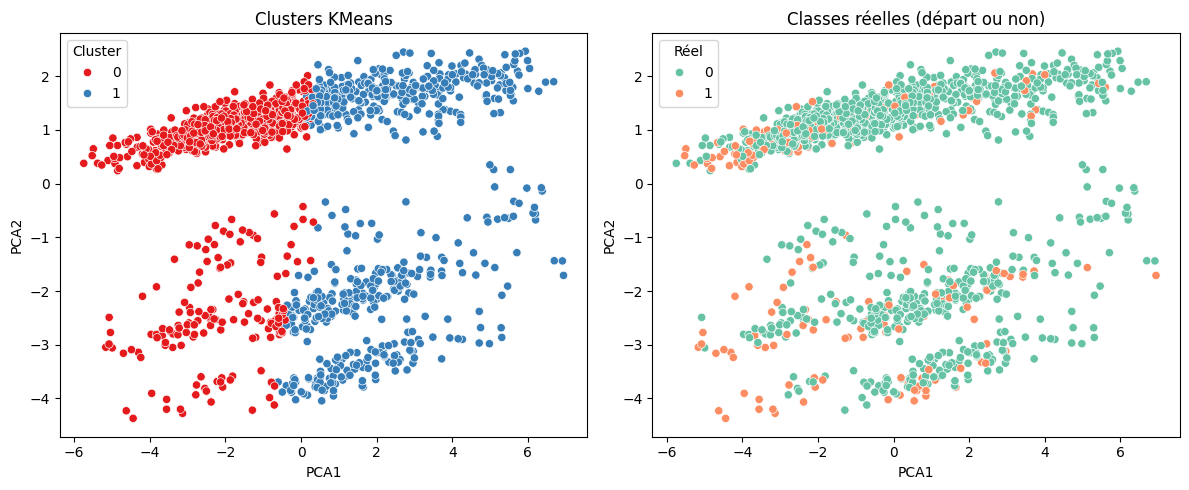

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# === 1. Préparation des données ===
X = data_encoded_cp.copy()  # Les variables explicatives (sans la cible)
y = data_cible_encoded['a_quitte_l_entreprise(Oui=1, Non=0)'].copy()

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 2. Clustering KMeans ===
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# === 3. PCA pour visualisation en 2D ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === 4. Assemblage dans un DataFrame ===
df_clusters = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_clusters['Cluster'] = clusters
df_clusters['Réel'] = y.values  # ou .to_numpy()

# === 5. Visualisation comparative ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_clusters, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('Clusters KMeans')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_clusters, x='PCA1', y='PCA2', hue='Réel', palette='Set2')
plt.title('Classes réelles (départ ou non)')

plt.tight_layout()
plt.show()


On constate en effet sur les classes réelles que les employés ayant démissionnés ont tendance à se regrouper vers la gauche, nous allons donc trouver l'explication de ce regroupement pour ces les deux premières composantes principales

### 2- Cercle de corrélation pour la PC1 et PC2

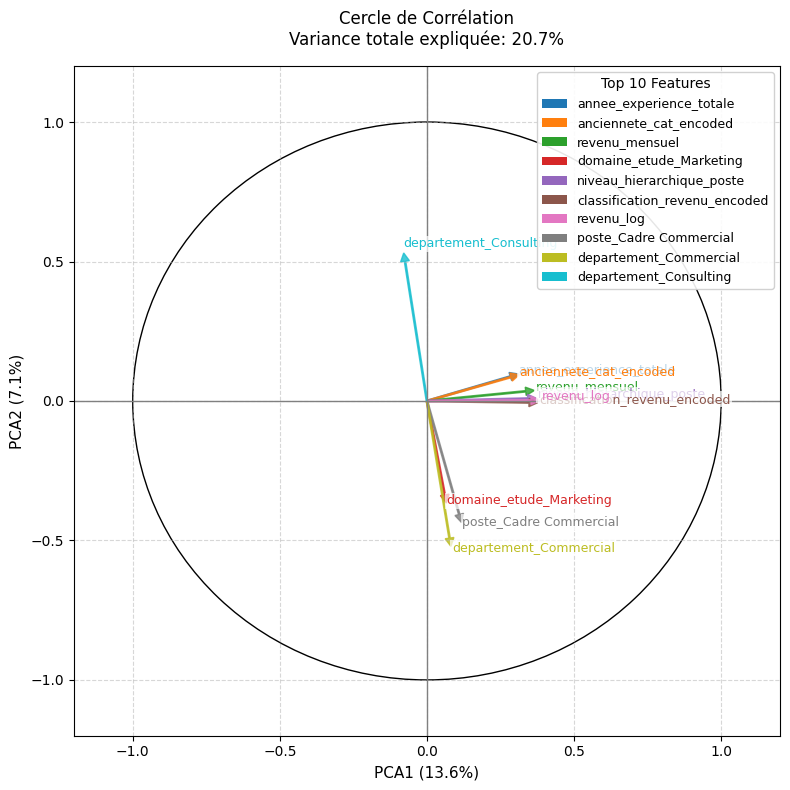

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Patch

# 1. Données
X = data_encoded_cp.copy()
feature_names = X.columns

# 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
components = pca.components_  # (2, n_features)

# Calcul des pourcentages de variance expliquée
explained_var_ratio = pca.explained_variance_ratio_ * 100

# 4. Calcul des normes pour sélectionner les 10 variables les plus importantes
norms = np.sqrt(components[0,:]**2 + components[1,:]**2)
top_10_indices = np.argsort(norms)[-10:]  # Indices des 10 plus grandes normes

# 5. Cercle de corrélation avec légende intégrée
plt.figure(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_artist(circle)

# Palette de couleurs pour les 10 features
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Tracé des flèches et préparation de la légende
legend_elements = []
for j, i in enumerate(top_10_indices):
    x = components[0, i]
    y = components[1, i]
    # Tracé de la flèche
    plt.arrow(0, 0, x, y, 
             head_width=0.03, 
             head_length=0.03, 
             fc=colors[j],
             ec=colors[j],
             alpha=0.8,
             width=0.005)
    # Texte avec fond blanc pour lisibilité
    plt.text(x * 1.1, y * 1.1, feature_names[i], 
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1),
            color=colors[j])
    
    # Éléments pour la légende
    legend_elements.append(Patch(facecolor=colors[j],
                               label=feature_names[i]))

# Ajout de la légende dans le cercle
plt.legend(handles=legend_elements,
          loc='upper right',
          fontsize=9,
          title="Top 10 Features",
          title_fontsize=10,
          framealpha=0.9)

plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)

# Labels avec pourcentages
plt.xlabel(f'PCA1 ({explained_var_ratio[0]:.1f}%)', fontsize=11)
plt.ylabel(f'PCA2 ({explained_var_ratio[1]:.1f}%)', fontsize=11)

# Titre avec variance totale
plt.title(f'Cercle de Corrélation\nVariance totale expliquée: {sum(explained_var_ratio):.1f}%',
         fontsize=12, pad=15)

plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Analyse des composantes principales :**

1. **Première composante (PCA1) - Axe horizontal** :
   - Dominée par la variable *salaire* (flèche la plus horizontale)
   - Valeurs positives (à droite) : salaires élevés → corrélés avec la rétention des employés
   - Valeurs négatives (à gauche) : salaires faibles → associés aux démissions

2. **Deuxième composante (PCA2) - Axe vertical** :
   - Principalement influencée par les *postes commerciaux/marketing* (flèches orientées vers le haut)
   - Valeurs positives (en haut) : 
     * Correspondent aux clusters de démissionnaires observés
     * Indiquent une tendance accrue à quitter l'entreprise dans ces services
   - Valeurs négatives (en bas) :
     * Représentent les postes de consultants
     * Montrent une meilleure rétention dans ces fonctions

**Conclusion croisée** :
Les démissions semblent concentrées parmi :
- les employés avec des salaires dans la moitié inférieure de l'échelle (gauche du graphique)
- ceux occupant des positions commerciales/marketing (partie supérieure du graphique)

Cette analyse est cohérente avec la position des clusters observés précédemment dans le quadrant supérieur gauche.

On pourra donc créer une colonne qui fera un croisement entre un poste commercial  (ou marketing) et le salaire lors du feature engineering, 

### 3- Nombre de composantes principales pour expiquer 80% de la variance

Nous allons maintenant trouver le nombre de composante principales nécessaire pour expliquer au moins 80% de la variance, c'est à dire l'ensemble de composantes principales qui sont à l'origine de ces regroupements

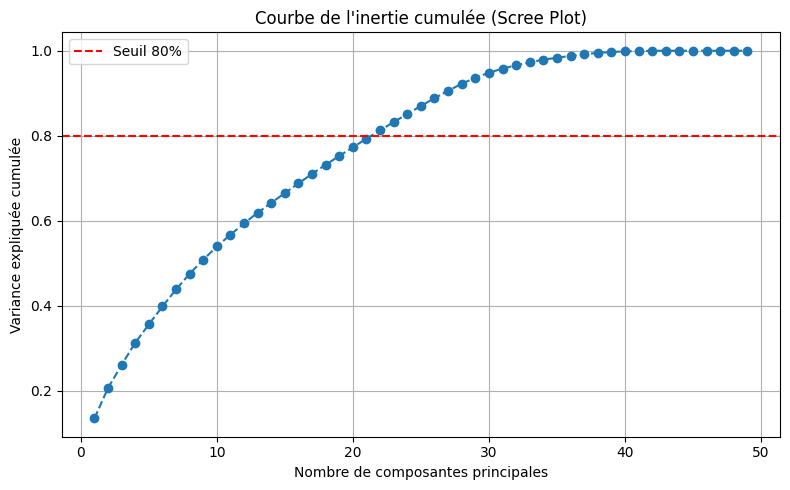

In [109]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded_cp)

# PCA (en gardant toutes les composantes)
pca = PCA()
pca.fit(X_scaled)

# Variance expliquée cumulée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Affichage de la courbe
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance expliquée cumulée")
plt.title("Courbe de l'inertie cumulée (Scree Plot)")
plt.grid(True)
plt.axhline(y=0.80, color='r', linestyle='--', label='Seuil 80%')
plt.legend()
plt.tight_layout()
plt.show()

Il faut au moins 20 composantes principales pour expliquer environ 80% de variances

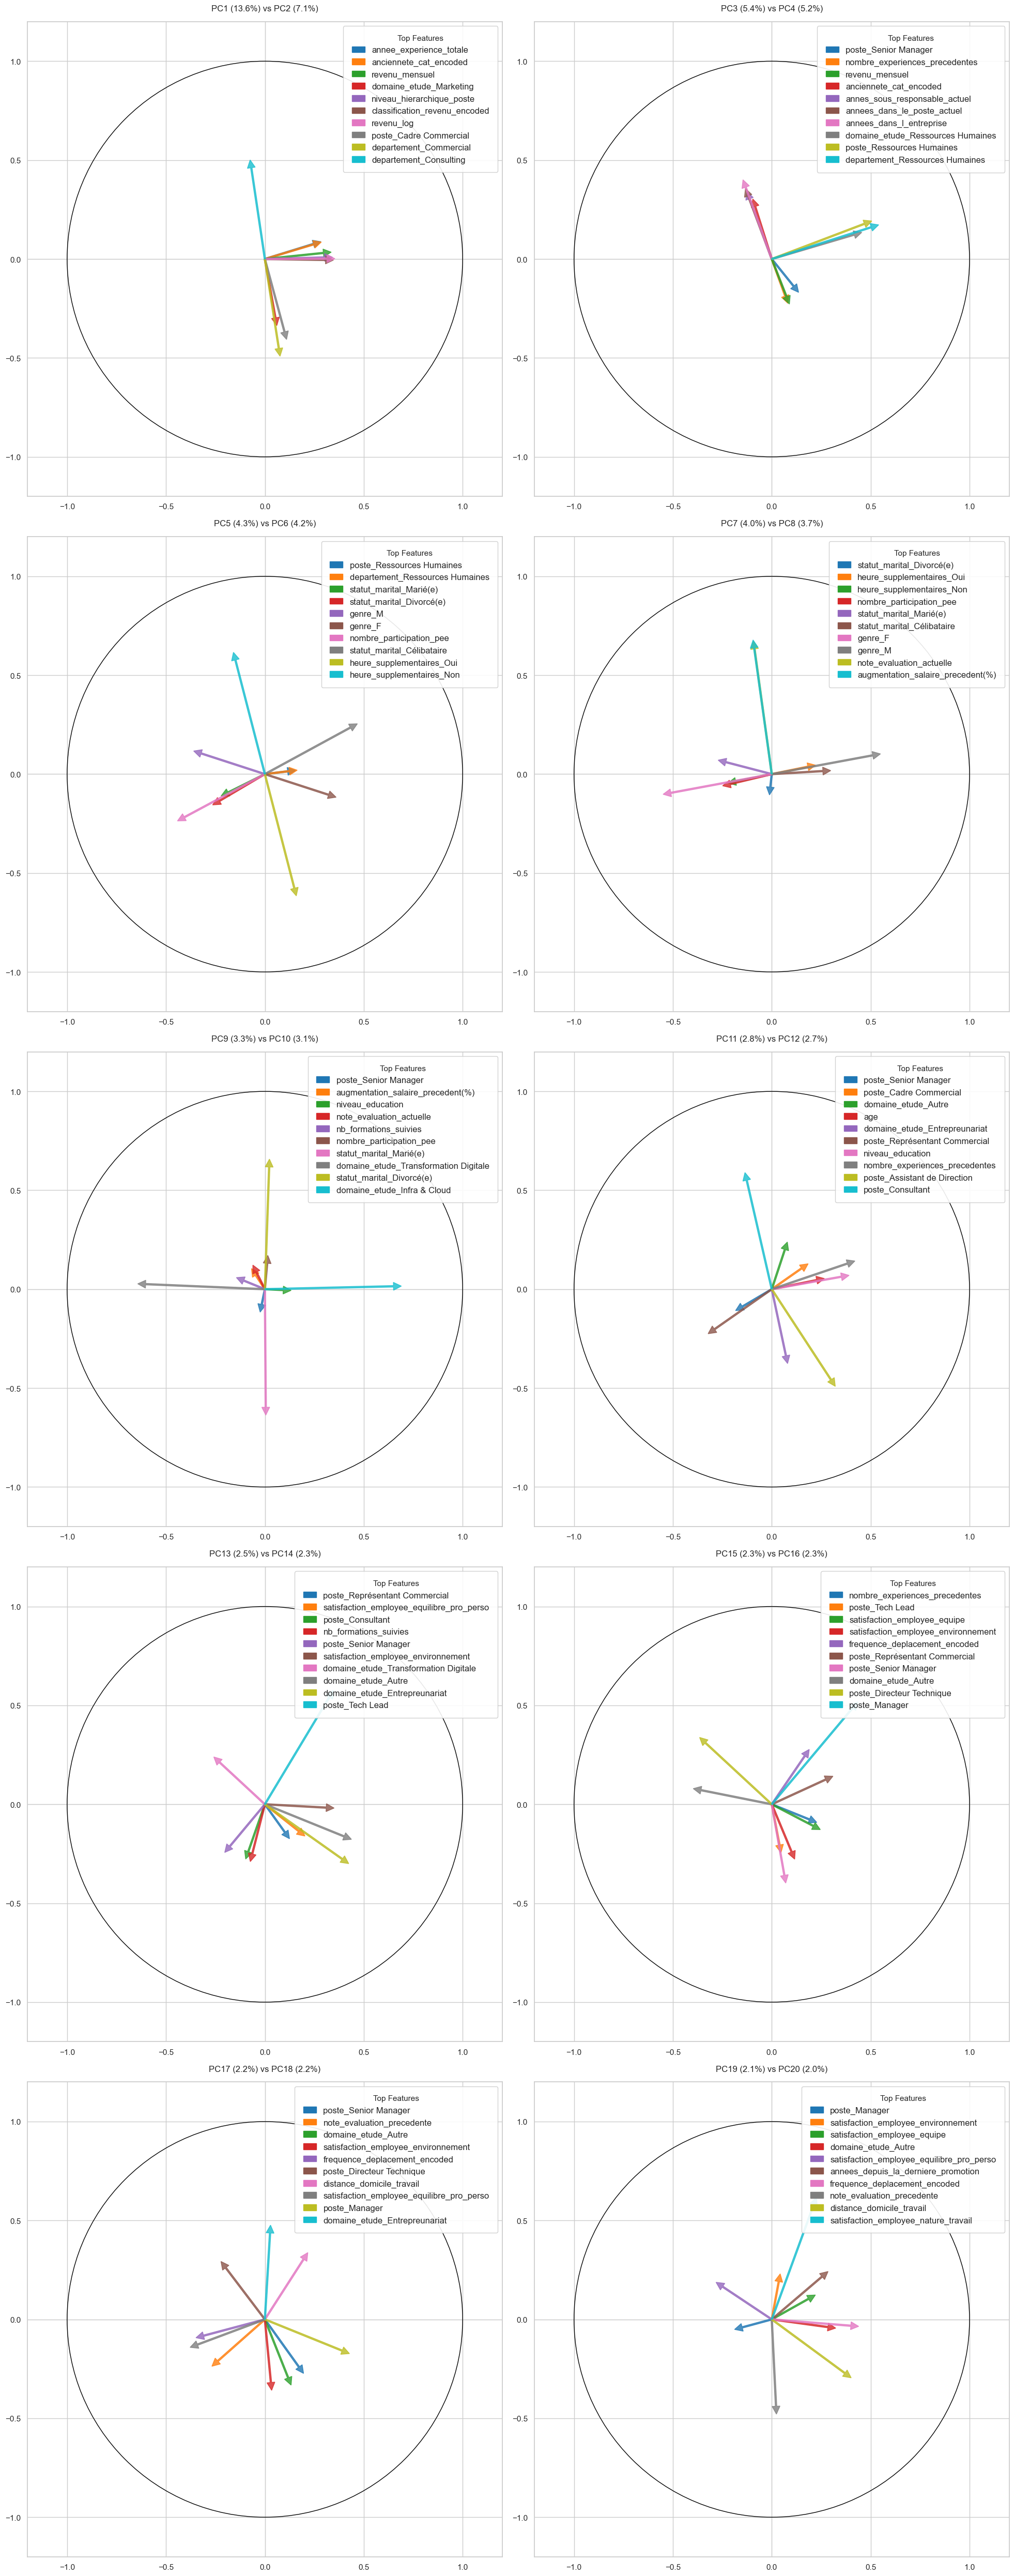


DÉTAIL DES COMPOSANTES PRINCIPALES (20 PREMIÈRES)

Composante   Variance (%)    Cumul (%)      
---------------------------------------------
PC1           13.55           13.55          
PC2           7.14            20.69          
PC3           5.43            26.12          
PC4           5.20            31.32          
PC5           4.33            35.65          
PC6           4.20            39.85          
PC7           4.03            43.88          
PC8           3.66            47.54          
PC9           3.31            50.84          
PC10          3.12            53.96          
PC11          2.77            56.73          
PC12          2.65            59.39          
PC13          2.51            61.90          
PC14          2.33            64.23          
PC15          2.29            66.52          
PC16          2.28            68.80          
PC17          2.24            71.03          
PC18          2.15            73.19          
PC19          2.06           

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Patch
import seaborn as sns

# 1. Standardisation et PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded_cp)
pca = PCA(n_components=20)
pca.fit(X_scaled)

# 2. Configuration de l'affichage
n_pairs = 10
rows = (n_pairs + 1) // 2
plt.figure(figsize=(20, rows * 10))

# Utilisation du style Seaborn moderne
sns.set_theme(style="whitegrid")

# 3. Palette de couleurs optimisée
colors = plt.cm.tab10.colors  # 10 couleurs distinctes

# 4. Fonction pour générer chaque cercle des corrélations
def plot_pca_pair(ax, pc1, pc2):
    components = pca.components_[[pc1, pc2]]
    norms = np.sqrt(components[0, :]**2 + components[1, :]**2)
    top_indices = np.argsort(norms)[-10:]
    
    # Cercle unité
    circle = plt.Circle((0, 0), 1, color='black', fill=False, zorder=1)
    ax.add_artist(circle)
    
    # Flèches colorées pour les 10 variables les plus contributrices
    for j, idx in enumerate(top_indices):
        x, y = components[0, idx], components[1, idx]
        ax.arrow(0, 0, x, y, 
                 head_width=0.04, 
                 head_length=0.04,
                 fc=colors[j],
                 ec=colors[j],
                 alpha=0.8,
                 width=0.008,
                 length_includes_head=True,
                 zorder=2)
    
    # Légende intégrée
    legend_elements = [Patch(facecolor=colors[j],
                              edgecolor=colors[j],
                              label=f"{data_encoded_cp.columns[idx]}") 
                       for j, idx in enumerate(top_indices)]
    
    ax.legend(handles=legend_elements,
              loc='upper right',
              fontsize=12,
              framealpha=0.9,
              title="Top Features",
              title_fontsize=11,
              borderpad=1.0,
              handlelength=1.5)
    
    # Configuration des axes
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_aspect('equal')
    ax.axhline(0, color='gray', lw=0.8, alpha=0.5, zorder=0)
    ax.axvline(0, color='gray', lw=0.8, alpha=0.5, zorder=0)
    
    # Titre avec la variance expliquée
    var_pc1 = pca.explained_variance_ratio_[pc1] * 100
    var_pc2 = pca.explained_variance_ratio_[pc2] * 100
    ax.set_title(f"PC{pc1+1} ({var_pc1:.1f}%) vs PC{pc2+1} ({var_pc2:.1f}%)",
                 pad=15, fontsize=12)

# 5. Génération des graphiques
for i in range(n_pairs):
    ax = plt.subplot(rows, 2, i+1)
    plot_pca_pair(ax, 2*i, 2*i+1)

plt.tight_layout()
plt.show()

# 6. Affichage des pourcentages de variance

print("\nDÉTAIL DES COMPOSANTES PRINCIPALES (20 PREMIÈRES)\n")
print(f"{'Composante':<12} {'Variance (%)':<15} {'Cumul (%)':<15}")
print("-"*45)

cumulative = 0
for i, var in enumerate(pca.explained_variance_ratio_):
    cumulative += var * 100
    print(f"PC{i+1:<11} {var*100:<15.2f} {cumulative:<15.2f}")

print("\n" + "="*60)
print(f"Variance totale expliquée par les 20 premières PC : {cumulative:.2f}%")
print("="*60)


## III- Extraction des fichiers 

In [ ]:
data_cible_encoded.to_csv('data_cible_encoded.csv', index=False)
data_encoded.to_csv('data_encoded.csv', index=False)
data_encoded_cp.to_csv('data_encoded_cp.csv', index=False)
data.to_csv('data.csv', index=False)
data_cible.to_csv('data_cible.csv', index=False)

# Voir l'étape 3 (modélisation) dans le second notebook via le lien ci-dessous

[Aller au second notebook](./Fonkou_Symphor_2_notebook_160625.ipynb)